# EDA - AQS Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Cleaned Data

As described earlier, the ASQ data contains annual summary data based of measured pollutants. CDC information regarding birth weight is also included, and relationships will be examined below.

In [2]:
# AQS sensor data collected via API

file_path = 'data/aqs_by_county_clean.csv'
aqs = pd.read_csv(file_path)

## Preliminary EDA - General

In [3]:
aqs.head() 

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
0,alabama,jefferson,2014,0.578752,28.600838,0.048302,24.918033,11.698347,687.0,1940.866,34.068,7376.0,3216.859,38.508,0.093,1
1,alabama,jefferson,2015,0.526681,22.163818,0.047164,23.883333,11.772881,681.0,1903.761,33.633,7032.0,3210.182,38.434,0.097,1
2,alabama,jefferson,2016,0.444555,28.544643,0.051325,24.256809,10.781667,709.0,1947.176,34.059,7061.0,3188.066,38.456,0.100,1
3,alabama,jefferson,2017,0.367024,20.712610,0.045971,22.300057,10.325455,662.0,1929.279,34.045,6767.0,3202.834,38.456,0.098,1
4,alabama,jefferson,2018,0.344179,23.718644,0.049131,22.985533,10.329508,570.0,1959.763,34.040,6560.0,3222.885,38.468,0.087,1


In [4]:
aqs.shape 

(1012, 16)

In [5]:
aqs.columns

Index(['state', 'county', 'year', 'Carbon monoxide', 'Nitrogen dioxide (NO2)',
       'Ozone', 'PM10 Total 0-10um STP', 'PM2.5 - Local Conditions',
       'births_low', 'avg_weight_low', 'avg_ges_age_low', 'births_all',
       'avg_weight_all', 'avg_ges_age_all', 'pct_low', 'high_rate'],
      dtype='object')

In [7]:
aqs.dtypes

state                        object
county                       object
year                          int64
Carbon monoxide             float64
Nitrogen dioxide (NO2)      float64
Ozone                       float64
PM10 Total 0-10um STP       float64
PM2.5 - Local Conditions    float64
births_low                  float64
avg_weight_low              float64
avg_ges_age_low             float64
births_all                  float64
avg_weight_all              float64
avg_ges_age_all             float64
pct_low                     float64
high_rate                     int64
dtype: object

In [8]:
aqs['year'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

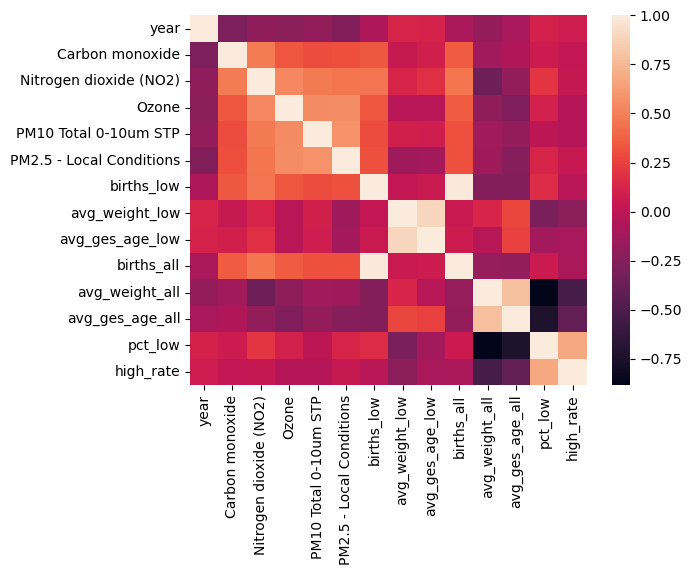

In [84]:
sns.heatmap(data=aqs.corr());

In [85]:
aqs.corr()

,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
year,1.000000,-0.284783,-0.205441,-0.235268,-0.190889,-0.271658,-0.079514,0.123315,0.116481,-0.088985,-0.181950,-0.097625,0.109230,0.067711
Carbon monoxide,-0.284783,1.000000,0.481558,0.335530,0.299211,0.302716,0.338543,0.041591,0.092333,0.355429,-0.131400,-0.065774,0.060382,0.019335
Nitrogen dioxide (NO2),-0.205441,0.481558,1.000000,0.532001,0.474691,0.459212,0.454067,0.122450,0.181509,0.457457,-0.348011,-0.190047,0.197803,0.033822
Ozone,-0.235268,0.335530,0.532001,1.000000,0.544358,0.552741,0.331060,-0.026980,-0.023345,0.352714,-0.206653,-0.276291,0.095332,-0.046305
PM10 Total 0-10um STP,-0.190889,0.299211,0.474691,0.544358,1.000000,0.578793,0.294027,0.091527,0.077573,0.308981,-0.127996,-0.178670,-0.007476,-0.047248
PM2.5 - Local Conditions,-0.271658,0.302716,0.459212,0.552741,0.578793,1.000000,0.311393,-0.133663,-0.111606,0.311609,-0.144439,-0.251139,0.122329,0.041465
births_low,-0.079514,0.338543,0.454067,0.331060,0.294027,0.311393,1.000000,0.016767,0.048745,0.989104,-0.254790,-0.256522,0.153893,-0.026109
avg_weight_low,0.123315,0.041591,0.122450,-0.026980,0.091527,-0.133663,0.016767,1.000000,0.895485,0.048606,0.125803,0.272415,-0.296743,-0.222018
avg_ges_age_low,0.116481,0.092333,0.181509,-0.023345,0.077573,-0.111606,0.048745,0.895485,1.000000,0.063157,-0.032544,0.249129,-0.117991,-0.101451
births_all,-0.088985,0.355429,0.457457,0.352714,0.308981,0.311609,0.989104,0.048606,0.063157,1.000000,-0.173957,-0.186392,0.057048,-0.089851


In [95]:
aqs.pct_low.mean() #calculates mean percentage of total births that are low birth weight for this dataset

0.06677667984189732

In [96]:
aqs.pct_low.median() #calculates median percentage of total births that are low birth weight for this dataset

0.066

### Discussion

The correlation between the individual pollutants and the high rate of low birth rate ranges from -0.0472 and 0.0677, which is not suggestive of strong correlation. However, in combination, there may be a stronger correlation. This will be examined through EDA in this section.

*Additionally, it may be important to note that this dataset, which excludes babies born to mothers with known risk factors such as smoking, has a lower mean percentage of low birth weights (6.7%) than the national average of 8.7%.*

## EDA By Column - Pollutants

It may be of use to observe minimums, maximums, means, and other statistical information for each of the pollutants. These will be examined below.

##### 1. Carbon monoxide

In [18]:
aqs['Carbon monoxide'].describe() #shows a statistical summary of the CO column

count    1012.000000
mean        0.381562
std         0.163689
min         0.043569
25%         0.267306
50%         0.352070
75%         0.468691
max         1.176400
Name: Carbon monoxide, dtype: float64

#### Cases with lowest CO values

In [20]:
aqs['Carbon monoxide'].nsmallest() #shows the smallest CO values & their respective row numbers

840    0.043569
928    0.050720
927    0.052440
839    0.053953
833    0.067373
Name: Carbon monoxide, dtype: float64

In [21]:
low_co = aqs.iloc[[840, 928, 927, 839, 833]] #creates a dataframe containing rows with the 5 lowest CO values

low_co

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
840,pennsylvania,erie,2020,0.043569,12.209169,0.041915,12.514794,6.522519,154.0,2040.617,34.383,1984.0,3267.116,38.383,0.078,0
928,texas,travis,2010,0.050720,6.810979,0.047627,16.949153,10.019298,852.0,2003.412,34.038,13281.0,3312.613,38.687,0.064,0
927,texas,travis,2009,0.052440,6.310294,0.048778,17.711864,10.072881,854.0,1946.509,33.830,13552.0,3313.626,38.654,0.063,0
839,pennsylvania,erie,2019,0.053953,3.955683,0.043456,12.366591,7.538290,133.0,1929.459,33.910,1885.0,3270.604,38.427,0.071,0
833,pennsylvania,cambria,2016,0.067373,15.233429,0.048015,14.779106,8.940451,50.0,1834.540,33.160,848.0,3296.351,38.529,0.059,0


The lowest CO values in the dataset occur in Travis County, TX, Eerie County, PA, and Cambria County PA. 

None of them are in the high rate low birth weight class.

#### Cases with highest CO values

In [23]:
aqs['Carbon monoxide'].nlargest() #shows the largest CO values & their respective row numbers

502    1.176400
119    1.126575
91     1.051252
117    1.014378
764    0.945322
Name: Carbon monoxide, dtype: float64

In [24]:
high_co = aqs.iloc[[502, 119, 91, 117, 764]] #creates a dataframe containing rows with the 5 highest CO values

high_co

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
502,indiana,vanderburgh,2011,1.176400,16.639881,0.053841,18.362069,12.264407,104.0,1941.587,33.673,1572.0,3275.976,38.250,0.066,0
119,california,los angeles,2008,1.126575,48.338843,0.063647,44.863337,16.089474,8537.0,1989.017,34.364,127739.0,3272.638,38.557,0.067,0
91,california,imperial,2009,1.051252,33.571031,0.058378,65.316667,7.974380,160.0,2028.075,34.525,2967.0,3352.014,38.712,0.054,0
117,california,los angeles,2006,1.014378,48.065753,0.065111,44.982759,16.642241,9406.0,1984.732,34.295,137740.0,3276.627,38.523,0.068,0
764,ohio,cuyahoga,2013,0.945322,24.580110,0.047341,41.066667,12.162810,941.0,1939.843,33.770,11382.0,3233.432,38.563,0.083,1


Three of the highest CO values in the dataset occur in California, two of these in Los Angeles County. One of the highest values occurs in Vanderburgh, IN, and the other in Cuyahoga County, OH. 

The data show that Cuyahoga County did have a high rate of low birth weight in 2013.

##### 2. Nitrogen dioxide

In [25]:
aqs['Nitrogen dioxide (NO2)'].describe() #shows a statistical summary for this column

count    1012.000000
mean       22.804918
std         9.029822
min         1.802920
25%        16.796648
50%        22.794647
75%        28.642434
max        50.014118
Name: Nitrogen dioxide (NO2), dtype: float64

#### Cases with lowest NO2 values

In [26]:
aqs['Nitrogen dioxide (NO2)'].nsmallest()

301    1.802920
84     3.198081
427    3.378037
650    3.453292
452    3.478848
Name: Nitrogen dioxide (NO2), dtype: float64

In [27]:
low_no2 = aqs.iloc[[301, 84, 427, 650, 452]] #creates a dataframe containing rows with the 5 lowest NO2 values

low_no2

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
301,california,santa cruz,2010,0.293742,1.802920,0.038155,14.163934,6.534828,151.0,1967.596,34.172,3013.0,3365.034,38.978,0.050,0
84,california,humboldt,2015,0.343309,3.198081,0.033180,18.162731,5.883898,60.0,1948.517,33.933,1157.0,3422.579,39.067,0.052,0
427,florida,orange,2020,0.477596,3.378037,0.040575,14.121097,6.880044,944.0,1981.965,34.052,12415.0,3239.759,38.439,0.076,0
650,montana,yellowstone,2007,0.364222,3.453292,0.047983,23.932203,7.961345,108.0,2091.269,34.833,1570.0,3302.662,38.527,0.069,0
452,hawaii,honolulu,2014,0.542413,3.478848,0.030855,19.963298,4.584700,498.0,2010.610,34.213,7523.0,3249.392,38.603,0.066,0


Two of the lowest NO2 values occur in Santa Cruz and Humbold Counties, CA. One ocurs in Orange, FL, one in Yellowstone, MT, and one in Honolulu, HI. 

None of these coincide with a high rate of low weight birth. 

#### Cases with highest NO2 values

In [28]:
aqs['Nitrogen dioxide (NO2)'].nlargest() #creates a dataframe containing rows with the 5 highest NO2 values

360    50.014118
119    48.338843
117    48.065753
209    48.023810
118    47.964187
Name: Nitrogen dioxide (NO2), dtype: float64

In [30]:
high_no2 = aqs.iloc[[360, 119, 117, 209, 118]] #creates a dataframe containing rows with the 5 highest NO2 values

high_no2

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
360,colorado,denver,2016,0.534266,50.014118,0.055500,29.196721,9.563535,569.0,2089.334,35.234,7762.0,3224.336,38.925,0.073,0
119,california,los angeles,2008,1.126575,48.338843,0.063647,44.863337,16.089474,8537.0,1989.017,34.364,127739.0,3272.638,38.557,0.067,0
117,california,los angeles,2006,1.014378,48.065753,0.065111,44.982759,16.642241,9406.0,1984.732,34.295,137740.0,3276.627,38.523,0.068,0
209,california,san bernardino,2006,0.605216,48.023810,0.066963,53.450000,17.538614,1978.0,1987.348,34.094,31377.0,3294.273,38.566,0.063,0
118,california,los angeles,2007,0.886850,47.964187,0.059475,38.446429,15.854717,9189.0,2002.742,34.323,134693.0,3276.185,38.508,0.068,0


Of the 5 largest NO2 values, three of these occur in Los Angeles County, CA. One is in San Bernardino, CA, and one is in Denver, CO. 

None of these values coincide with a high rate of low birth rate.

##### 3. Ozone

In [11]:
aqs['Ozone'].describe()

count    1012.000000
mean        0.049607
std         0.007804
min         0.029180
25%         0.044536
50%         0.049313
75%         0.053946
max         0.074551
Name: Ozone, dtype: float64

#### Cases with lowest O3 values

In [31]:
aqs['Ozone'].nsmallest()

458    0.029180
635    0.030483
243    0.030726
452    0.030855
83     0.030893
Name: Ozone, dtype: float64

In [32]:
low_ozone = aqs.iloc[[458, 635, 243, 452, 83]]

low_ozone

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
458,hawaii,honolulu,2020,0.294769,9.008033,0.029180,12.764980,3.925611,585.0,2042.154,34.391,8492.0,3267.433,38.578,0.069,0
635,minnesota,hennepin,2020,0.445808,11.386310,0.030483,30.933650,8.740955,709.0,2013.220,34.396,11334.0,3342.649,38.773,0.063,0
243,california,san francisco,2013,0.400116,26.805587,0.030726,17.218750,10.173668,433.0,2069.596,34.850,7753.0,3298.645,38.930,0.056,0
452,hawaii,honolulu,2014,0.542413,3.478848,0.030855,19.963298,4.584700,498.0,2010.610,34.213,7523.0,3249.392,38.603,0.066,0
83,california,humboldt,2014,0.313675,7.060933,0.030893,17.841023,10.776247,48.0,1821.479,33.021,1069.0,3446.512,39.102,0.045,0


Two of the lowest ozone values occur in Honolulu, HI, one in Humboldt, CA, one in San Francisco, CA, and one in Hennepin, MN. 

None of the values coincide with a high rate of low birth weight.

#### Cases with highest O3 values

In [33]:
aqs['Ozone'].nlargest()

221    0.074551
182    0.071982
130    0.070233
218    0.070156
210    0.069740
Name: Ozone, dtype: float64

In [34]:
high_ozone = aqs.iloc[[221, 182, 130, 218, 210]]

high_ozone

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
221,california,san bernardino,2020,0.428172,43.779130,0.074551,40.977656,17.742911,1653.0,1984.623,33.970,22729.0,3257.038,38.487,0.073,0
182,california,riverside,2009,0.470886,32.905028,0.071982,65.173058,20.458778,1648.0,2002.341,34.229,27876.0,3320.870,38.619,0.059,0
130,california,los angeles,2020,0.464577,39.995690,0.070233,30.013895,16.128814,5244.0,2027.595,34.333,81812.0,3274.995,38.609,0.064,0
218,california,san bernardino,2017,0.500490,45.651289,0.070156,37.833333,16.988306,1676.0,1977.635,33.980,24938.0,3268.242,38.550,0.067,0
210,california,san bernardino,2008,0.486041,41.848901,0.069740,42.733333,15.815044,1849.0,1944.891,33.836,28769.0,3282.504,38.523,0.064,0


The 5 highest Ozone values in the dataset occur in California: three in San Bernardino, one in Riverside, and one in Los Angeles.

None of these values coincide with a high rate of low weight birth.

##### 4. PM10

In [13]:
aqs['PM10 Total 0-10um STP'].describe()

count    1012.000000
mean       24.706734
std        11.726393
min         4.941176
25%        16.723075
50%        21.807638
75%        29.731275
max        79.639344
Name: PM10 Total 0-10um STP, dtype: float64

#### Cases with lowest PM10 values

In [37]:
aqs['PM10 Total 0-10um STP'].nsmallest()

981    4.941176
982    5.663717
979    5.916667
980    5.983333
977    6.638655
Name: PM10 Total 0-10um STP, dtype: float64

In [39]:
low_pm10 = aqs.iloc[[981, 982, 979, 980, 977]]

low_pm10

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
981,vermont,chittenden,2019,0.338344,12.193889,0.040739,4.941176,6.684913,37.0,2262.730,36.378,985.0,3414.624,39.138,0.038,0
982,vermont,chittenden,2020,0.314784,10.269972,0.041003,5.663717,6.807023,62.0,1959.823,34.081,1098.0,3405.949,38.920,0.056,0
979,vermont,chittenden,2017,0.324265,12.377348,0.040792,5.916667,5.255436,41.0,2007.049,33.902,1039.0,3429.241,39.117,0.039,0
980,vermont,chittenden,2018,0.311444,11.812000,0.041447,5.983333,6.579436,39.0,2090.051,34.897,1048.0,3428.575,39.096,0.037,0
977,vermont,chittenden,2013,0.406614,14.001377,0.043269,6.638655,6.125439,76.0,1988.868,33.961,1279.0,3416.342,39.032,0.059,0


It appears that all of the lowest pm10 values occur in Chettenden County, VT.

None of these values occur with a high rate of low birth weight...in fact, the range of 3.8 % to 5.6% low birth weight (pct_low) values appears to be the lowest range observed during this section of EDA.

*Additionally, the low pm10 group is the only one thus far where the average gestational age for all births (avg_ges_age_all) is 39 months in the 4/5 cases - in all other high/low groups, average gestational age is 38 months in 4/5 or 5/5 cases.*

#### Cases with highest PM10 values

In [40]:
aqs['PM10 Total 0-10um STP'].nlargest()

896    79.639344
187    79.363073
88     74.632653
180    68.436364
181    65.775452
Name: PM10 Total 0-10um STP, dtype: float64

In [42]:
high_pm10 = aqs.iloc[[896, 187, 88, 180, 181]]

high_pm10

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
896,texas,el paso,2020,0.261486,31.397500,0.052081,79.639344,9.183343,741.0,2008.279,34.363,9279.0,3181.520,38.239,0.080,0
187,california,riverside,2014,0.471056,28.697353,0.065258,79.363073,10.792003,1548.0,2023.039,34.348,27480.0,3315.650,38.695,0.056,0
88,california,imperial,2006,0.695384,34.462396,0.061233,74.632653,12.381818,165.0,1994.261,34.176,2956.0,3343.053,38.580,0.056,0
180,california,riverside,2007,0.691629,36.763085,0.065225,68.436364,20.892727,1792.0,1991.933,34.171,29939.0,3312.755,38.528,0.060,0
181,california,riverside,2008,0.561022,34.923077,0.068620,65.775452,17.047619,1742.0,1981.302,33.994,28778.0,3317.897,38.536,0.061,0


Three of the highest pm10 values occur in Riverside, CA, while one occurs in Imperial, CA, and one in El Paso, TX. 

None of these coincide with a high rate of low weight birth...however, the range of 6.0% to 8.0% percent low birth weight appears to be the highest range (pct_low) seen during this section of EDA.

##### 5. PM 2.5

In [14]:
aqs['PM2.5 - Local Conditions'].describe()

count    1012.000000
mean       10.225568
std         3.000579
min         3.902133
25%         8.242385
50%         9.669004
75%        11.700189
max        23.466667
Name: PM2.5 - Local Conditions, dtype: float64

#### Cases with lowest PM2.5 values

In [43]:
aqs['PM2.5 - Local Conditions'].nsmallest()

457    3.902133
458    3.925611
454    4.225003
456    4.337143
455    4.407101
Name: PM2.5 - Local Conditions, dtype: float64

In [50]:
low_pm2_5 = aqs.iloc[[457, 458, 454, 456, 455]]

low_pm2_5

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
457,hawaii,honolulu,2019,0.361191,11.032386,0.032122,13.670302,3.902133,562.0,2014.290,34.148,8774.0,3270.090,38.629,0.064,0
458,hawaii,honolulu,2020,0.294769,9.008033,0.029180,12.764980,3.925611,585.0,2042.154,34.391,8492.0,3267.433,38.578,0.069,0
454,hawaii,honolulu,2016,0.603464,3.960622,0.032486,20.335525,4.225003,709.0,1991.109,34.161,10013.0,3257.510,38.549,0.071,0
456,hawaii,honolulu,2018,0.453069,10.406052,0.034515,14.947888,4.337143,660.0,1978.467,33.924,9520.0,3253.912,38.511,0.069,0
455,hawaii,honolulu,2017,0.498002,12.213483,0.033042,15.551392,4.407101,621.0,1967.789,33.897,9594.0,3261.668,38.577,0.065,0


All of the lowest PM2.5 values occur in Honolulu, HI. 

None of these coincide with a high rate of low birth weight.

#### Cases with highest PM2.5 values

In [45]:
aqs['PM2.5 - Local Conditions'].nlargest()

116    23.466667
106    22.338655
109    22.301695
103    22.141379
105    21.905172
Name: PM2.5 - Local Conditions, dtype: float64

In [51]:
high_pm2_5 = aqs.iloc[[116, 106, 109, 103, 105]]

high_pm2_5

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
116,california,kern,2020,0.307559,28.599169,0.061036,58.877193,23.466667,766.0,1977.843,34.182,10969.0,3294.804,38.630,0.070,0
106,california,kern,2009,0.372180,35.312865,0.064236,56.333333,22.338655,824.0,2015.006,34.556,12752.0,3292.794,38.735,0.065,0
109,california,kern,2013,0.303266,31.179191,0.061058,51.377049,22.301695,814.0,1980.361,34.169,13004.0,3311.717,38.679,0.063,0
103,california,kern,2006,0.561203,39.955923,0.067856,56.338983,22.141379,783.0,1965.909,34.128,11225.0,3309.881,38.564,0.070,0
105,california,kern,2008,0.493117,37.112994,0.069000,54.191176,21.905172,782.0,1993.632,34.429,11173.0,3281.471,38.645,0.070,0


The highest pm 2.5 values all occur in Kern, CA. 

None of these values coincide with a high rate of low birth weight.

### Discussion

In this section, the cases with highest and lowest values of each of the pollutants were observed.

When comparing the groups with high versus low values of each pollutant, the most distinct appeared to be those involving pm10 concentration.

As all of the 5 lowest pm10 values occurred in Chittenden County, VT, and 3/5 of the highest pm10 values occured in Riverside, CA, further comparisons between the two counties are warrented.

## Visualizations - Chittenden, VT and Riverside, CA

#### Creating a dataframe with the two counties of interest

##### Chittenden

In [53]:
chittenden = aqs.loc[(aqs['county'] == 'chittenden') & (aqs['state'] == 'vermont' )]#creates dataframe with only rows for chittenden county

chittenden.head() #displays top 5 rows of dataframe

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
971,vermont,chittenden,2006,0.345426,21.178814,0.043077,14.180328,8.354167,65.0,1940.292,33.631,1236.0,3432.320,38.947,0.053,0
972,vermont,chittenden,2007,0.431138,21.134957,0.045161,13.087719,8.950000,73.0,1977.260,34.384,1226.0,3438.842,38.953,0.060,0
973,vermont,chittenden,2008,0.391463,10.254124,0.044428,12.983607,7.807759,46.0,1957.935,33.652,1148.0,3472.898,39.038,0.040,0
974,vermont,chittenden,2009,0.375785,9.047352,0.041483,12.620690,7.039167,54.0,1947.759,33.759,1220.0,3442.759,39.092,0.044,0
975,vermont,chittenden,2010,0.388297,16.741195,0.044278,13.189655,7.169748,73.0,1898.685,33.370,1183.0,3412.081,38.915,0.062,0


In [56]:
chittenden.shape

(12, 16)

In [75]:
chittenden.high_rate.value_counts()

0    12
Name: high_rate, dtype: int64

There are no high rate low birth weight years in Chittenden County.

##### Riverside

In [54]:
riverside = aqs.loc[(aqs['county'] == 'riverside') & (aqs['state'] == 'california' )]#creates dataframe with only rows for chittenden county

riverside.head() #displays top 5 rows of dataframe

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
179,california,riverside,2006,0.677182,36.495775,0.066793,64.084746,20.781416,1906.0,1980.997,34.116,30990.0,3317.505,38.520,0.062,0
180,california,riverside,2007,0.691629,36.763085,0.065225,68.436364,20.892727,1792.0,1991.933,34.171,29939.0,3312.755,38.528,0.060,0
181,california,riverside,2008,0.561022,34.923077,0.068620,65.775452,17.047619,1742.0,1981.302,33.994,28778.0,3317.897,38.536,0.061,0
182,california,riverside,2009,0.470886,32.905028,0.071982,65.173058,20.458778,1648.0,2002.341,34.229,27876.0,3320.870,38.619,0.059,0
183,california,riverside,2010,0.476600,30.339650,0.064808,42.700000,15.199118,1587.0,2014.537,34.202,27996.0,3328.355,38.649,0.057,0


In [57]:
riverside.shape

(15, 16)

In [77]:
riverside.high_rate.value_counts()

0    15
Name: high_rate, dtype: int64

There are no high rate years in Riverside either.

##### Concatenation

In [58]:
chit_river = pd.concat([chittenden, riverside], ignore_index = True, axis = 0) #combines the two datasets into one

chit_river.county.unique() 

array(['chittenden', 'riverside'], dtype=object)

The dataset has been created. Now, visualizations will be prepared.

#### 1. Carbon monoxide

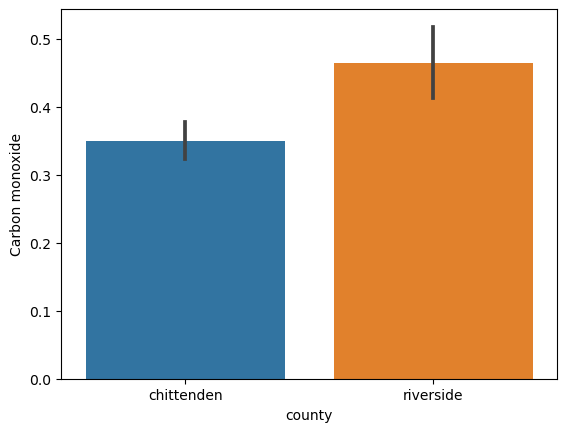

In [76]:
sns.barplot(data= chit_river, x='county', y=chit_river['Carbon monoxide']);

#### 2. Nitrogen Dioxide

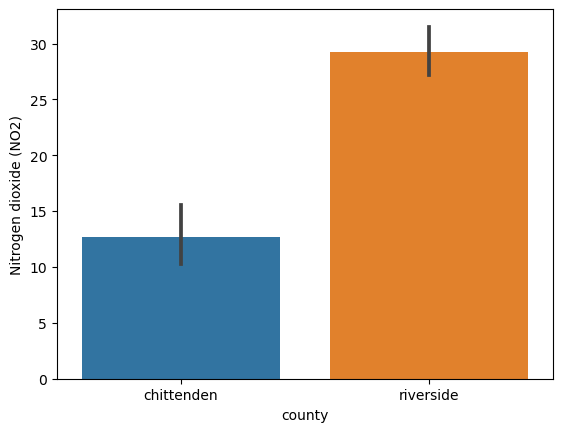

In [78]:
sns.barplot(data= chit_river, x='county', y=chit_river['Nitrogen dioxide (NO2)']);

#### 3. Ozone

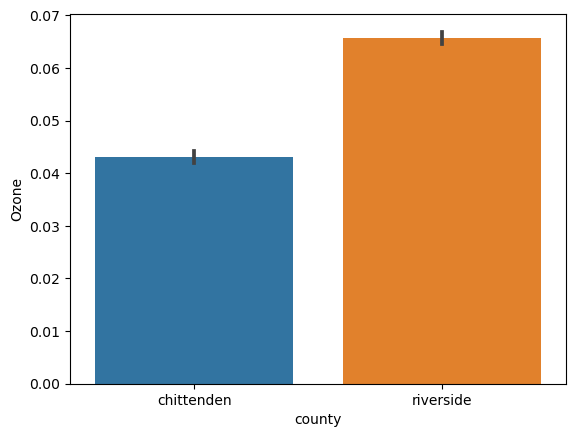

In [79]:
sns.barplot(data= chit_river, x='county', y=chit_river['Ozone']);

#### 4. PM 10 Concentrations

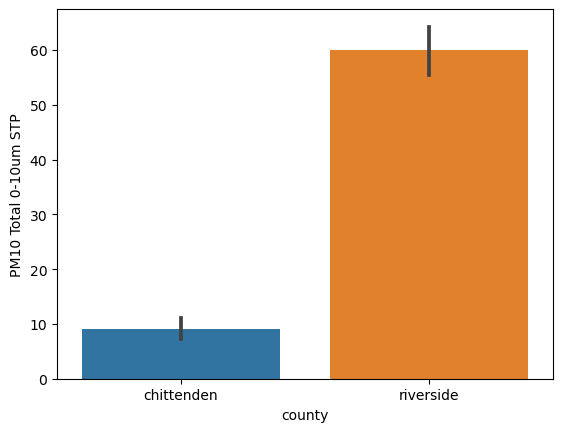

In [73]:
sns.barplot(data= chit_river, x='county', y=chit_river['PM10 Total 0-10um STP']);

#### 5. PM2.5 Concentrations

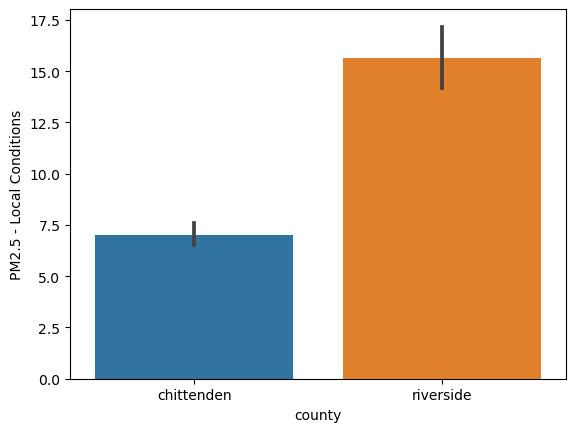

In [80]:
sns.barplot(data= chit_river, x='county', y=chit_river['PM2.5 - Local Conditions']);

#### 6. Pct Low Births

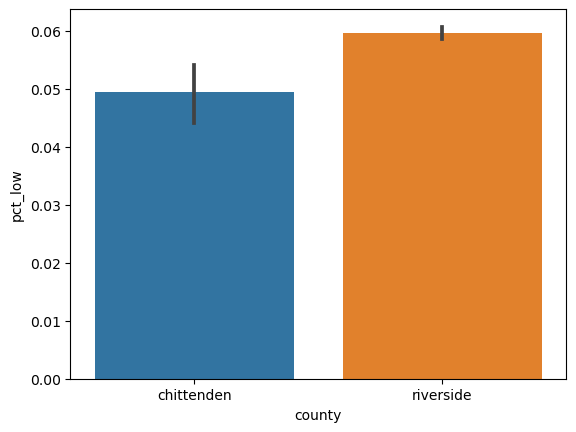

In [72]:
sns.barplot(data = chit_river, x = 'county', y='pct_low');

In [81]:
chittenden.pct_low.mean()

0.049416666666666664

In [82]:
riverside.pct_low.mean()

0.059666666666666666

### Discussion

From the visualiations, it becomes clear that the average concentrations of all of the pollutants assessed between years 2006 - 2020 is higher in Riverside than in Chittenden. 

Additionally, we can see that the mean percent of low birth weights is higher in Riverside than in Chittenden- a difference of more than 1%.

This could suggest that prenatal exposure to air pollutants does contribute to low birth weight - although both counties have an average percentage of low birth weights that is lower than the national average of 8.7%, and the current dataset average of 6.7%.

As this is informative, similar comparison visualizations of the high rate of low birth weight cases (1) and not high rate of low birth rate cases (0) will be prepared below.

## Visualizations - High Rate versus non-High Rate of Low Birth Weight 

#### 1. Carbon Monoxide

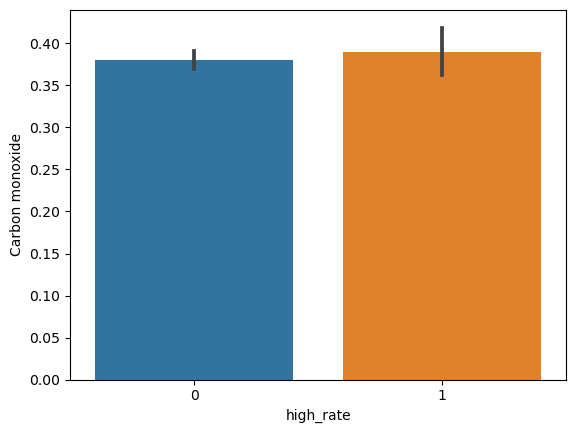

In [88]:
sns.barplot(data= aqs, x='high_rate', y=aqs['Carbon monoxide']);

#### 2. Nitrogen Dioxide

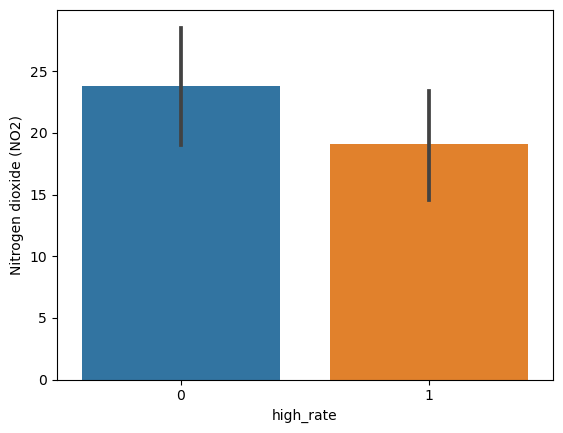

In [89]:
sns.barplot(data= aqs, x='high_rate', y=chit_river['Nitrogen dioxide (NO2)']);

#### 3. Ozone

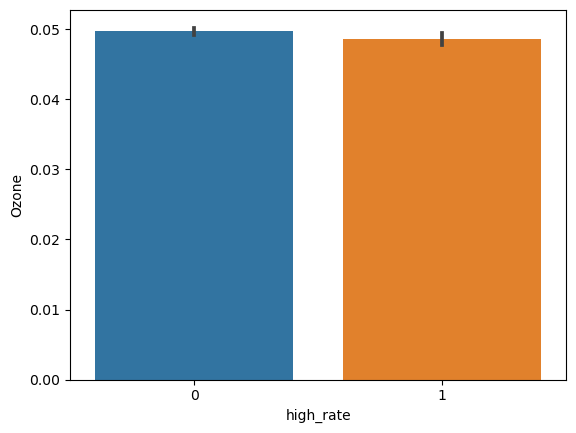

In [90]:
sns.barplot(data= aqs, x='high_rate', y=aqs['Ozone']);

#### 4. PM10 Concentrations

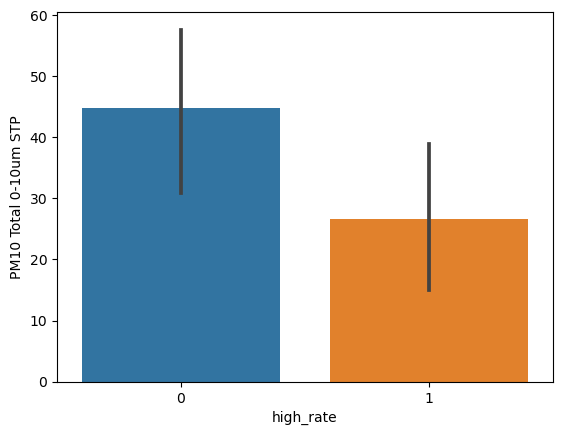

In [91]:
sns.barplot(data= aqs, x='high_rate', y=chit_river['PM10 Total 0-10um STP']);

#### 5. PM 2.5 Concentrations

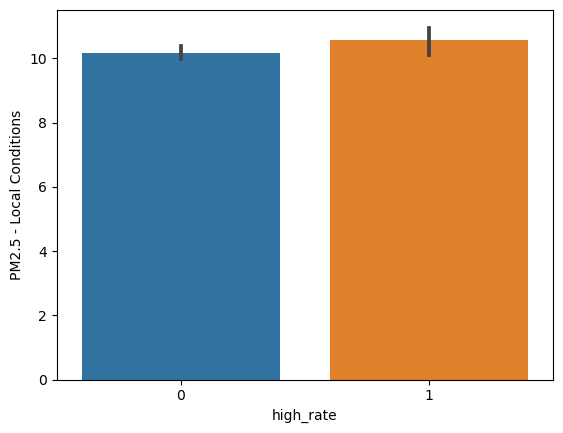

In [92]:
sns.barplot(data= aqs, x='high_rate', y=aqs['PM2.5 - Local Conditions']);

#### 6. Pct Low Birth Weight

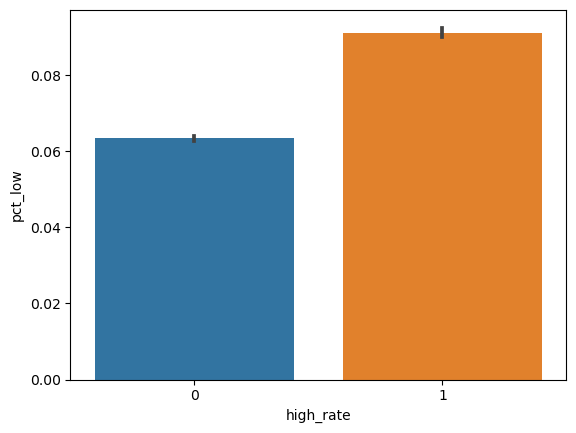

In [93]:
sns.barplot(data = aqs, x = 'high_rate', y='pct_low');

In [94]:
aqs.groupby('high_rate')['pct_low'].mean()

high_rate
0    0.063405
1    0.091146
Name: pct_low, dtype: float64

In [97]:
aqs.groupby('high_rate')['pct_low'].median()

high_rate
0    0.063
1    0.090
Name: pct_low, dtype: float64

In [101]:
aqs.high_rate.value_counts(normalize = True)

0    0.878458
1    0.121542
Name: high_rate, dtype: float64

### Discussion

When comparing the high rate versus not high rate low birth weight groups, it appears that those with high rate (defined as > 8.7%) typically had lower or similar pollutant values than the not high rate group, which is not the anticipated finding.

This may be due to the relatively wide variety of counties, years, and exposure levels that are within the not high rate group, as it comprises 87.8% of the dataset.

Still, we may be able to create a model that effectively distinguishes between the two groups. This will occur in the next notebook.